In [163]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime

In [164]:
df = pd.read_json('C:\\Users\\SBS\IMPORTED_DATA\\ta.json')
#df.head(50)

#### Count nnbr of rows for each year for an instrument


In [192]:
instru = "ADWYA"
df2=df.loc[df['instrument'] == instru]
#lastTradingData = df2[(df['date'] >= datetime(2012,1,1)) & (df2['date'] <= datetime(2012,12,31))]
#len(lastTradingData)
YEAR =['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
nb_r =[]
for i in range(10):
    lastTradingData = df2[(df['date'] >= datetime(2012+i,1,1)) & (df2['date'] <= datetime(2012+i,12,31))]
    #print(len(lastTradingData))
    #YEAR.append(2012+i)
    nb_r.append(len(lastTradingData))
print(YEAR)
print(nb_r)

#df_repeated_with_index = pd.concat([df1]*2)
#print(df_repeated_with_index)

********************************************************


C:\Users\SBS\AppData\Local\Temp/ipykernel_18456/3333975982.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lastTradingData = df2[(df['date'] >= datetime(2012+i,1,1)) & (df2['date'] <= datetime(2012+i,12,31))].resetIndex()


AttributeError: 'DataFrame' object has no attribute 'resetIndex'

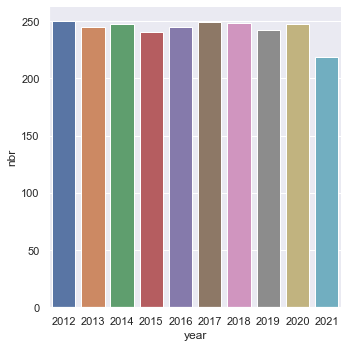

In [190]:
# creating the bar plot
datasset = pd.DataFrame({'year': YEAR, 'nbr': nb_r}, columns=['year', 'nbr'])
# who v/s fare barplot
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(x = 'year',y = 'nbr',kind="bar",data = datasset)


#### OVERALL row count for each year

In [194]:
YEAR =['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
nb_y=0
nbb =[]
yearIndex = 1
df_nbRows_YEARS = pd.DataFrame(columns = ['Year', 'nb'])
for year_i in YEAR:
    current_year = year_i
    for j in df['date']: 
        dd = datetime.strptime(str(j), '%Y-%m-%d %H:%M:%S') 
        if ( j.year == current_year):
            nb_y= nb_y+1
    print('NUMBER OF NB ROWS  FOR YEAR ', year_i, '= ',nb_y)
    
    nbb.append(str(year_i))
    nbb.append(nb_y)
    df_nbRows_YEARS.loc[yearIndex]=nbb
    nb_y=0
    yearIndex+=1
    nbb=[]

NUMBER OF NB ROWS  FOR YEAR  2012 =  0
NUMBER OF NB ROWS  FOR YEAR  2013 =  0
NUMBER OF NB ROWS  FOR YEAR  2014 =  0
NUMBER OF NB ROWS  FOR YEAR  2015 =  0
NUMBER OF NB ROWS  FOR YEAR  2016 =  0
NUMBER OF NB ROWS  FOR YEAR  2017 =  0
NUMBER OF NB ROWS  FOR YEAR  2018 =  0
NUMBER OF NB ROWS  FOR YEAR  2019 =  0
NUMBER OF NB ROWS  FOR YEAR  2020 =  0
NUMBER OF NB ROWS  FOR YEAR  2021 =  0


In [187]:
df_nbRows_YEARS

,Year,nb
1,2012,11635
2,2013,12016
3,2014,13924
4,2015,14754
5,2016,15174
6,2017,14952
7,2018,15212
8,2019,14206
9,2020,14415
10,2021,12768


#### FINANCIAL PLOTTING

# ==============================================================================================

In [15]:
import cufflinks as cf
import yfinance as yf
import warnings

##### Configure Cufflinks to adpot the theme pearl, turn off the wordl_readable option, This is recommended to switch the Cufflinks to go_offline to improve the chart rendering performance.

In [16]:
warnings.filterwarnings("ignore")
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

### Aqcuisition of stock data

In [17]:

single_stock = yf.download('msft', start="2020-05-27", end="2021-05-27")

[*********************100%***********************]  1 of 1 completed


In [18]:
df2

,_id,interRSI,interBollingerBands,interROC,interMACD,interMOM,ADL,price,instrument,date,WEMA,OBV,RSI,ROC,MOM,ATR,Stochastic,WilliamsR,BollingerBands,MACD
17804,{'$oid': '61fe0c0a5e2f1c1a6001a91c'},0,0,0,0,0,-83,3.977,ADWYA,2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17805,{'$oid': '61fe0c0a5e2f1c1a6001a91d'},0,0,0,0,0,2206,3.983,ADWYA,2012-01-04,NaN,2289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17806,{'$oid': '61fe0c0a5e2f1c1a6001a91e'},0,0,0,0,0,10241,3.994,ADWYA,2012-01-05,NaN,10324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17807,{'$oid': '61fe0c0a5e2f1c1a6001a91f'},0,0,0,0,0,14198,3.994,ADWYA,2012-01-06,NaN,10324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17808,{'$oid': '61fe0c0a5e2f1c1a6001a920'},0,0,0,0,0,35758,4.045,ADWYA,2012-01-09,3.998600,34759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117973,{'$oid': '61fe0c285e2f1c1a60033065'},0,1,0,0,0,15393495,5.000,ADWYA,2022-01-31,4.909099,16168153.0,65.40,6.382979,"{'MOM': 0.29999999999999905, 'EmaMOM': 0.06139...",0.105469,"{'k': 88.67924528301893, 'd': 91.72819250751992}",-11.320755,"{'middle': 4.807500000000006, 'upper': 5.01791...","{'MACD': 0.061131780360359, 'signal': 0.040157..."
117974,{'$oid': '61fe0c285e2f1c1a60033066'},0,0,0,0,0,15407104,5.080,ADWYA,2022-02-01,4.943279,16181762.0,69.61,8.085106,"{'MOM': 0.28, 'EmaMOM': 0.05695426394253}",0.103650,"{'k': 100, 'd': 92.45283018867933}",NaN,"{'middle': 4.827500000000007, 'upper': 5.06046...","{'MACD': 0.072043528361921, 'signal': 0.046534..."
117975,{'$oid': '61fe0c285e2f1c1a60033067'},-1,1,0,0,0,15422144,5.100,ADWYA,2022-02-02,4.974623,16196802.0,70.57,6.250000,"{'MOM': 0.229999999999999, 'EmaMOM': 0.0465163...",0.103389,"{'k': 100, 'd': 96.22641509433969}",NaN,"{'middle': 4.847500000000006, 'upper': 5.10102...","{'MACD': 0.081367051401755, 'signal': 0.053501..."
117976,{'$oid': '61fe0c285e2f1c1a60033068'},-1,1,0,0,0,15422144,5.110,ADWYA,2022-02-03,5.001698,16206131.0,71.07,4.928131,"{'MOM': 0.20999999999999902, 'EmaMOM': 0.04225...",0.097433,"{'k': 98.30508474576276, 'd': 99.43502824858763}",-1.694915,"{'middle': 4.868000000000006, 'upper': 5.13637...","{'MACD': 0.08854226687282901, 'signal': 0.0605..."


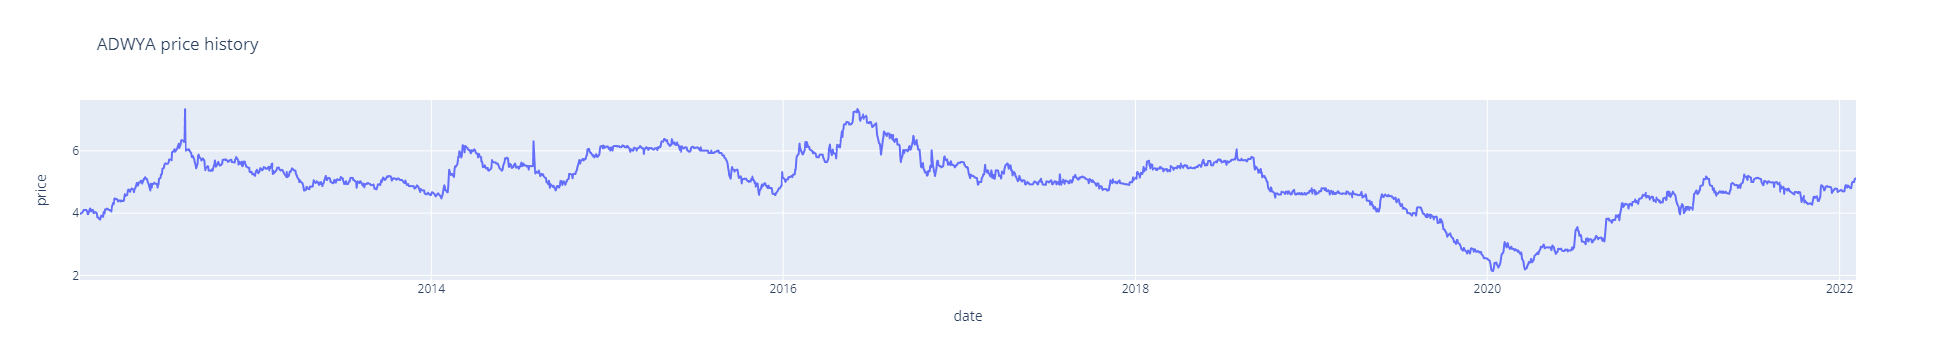

In [22]:
import plotly.express as px
fig =px.line(df2, x="date",y="price", title="ADWYA price history")
fig.show()

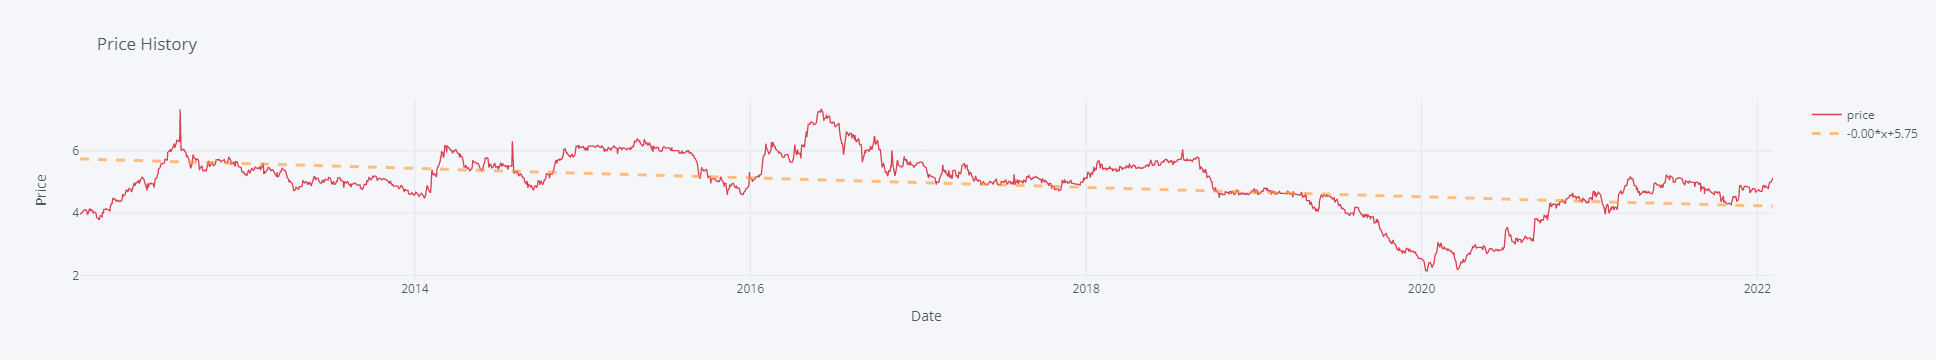

In [47]:
df2_plot=df2.iplot(x="date",y="price",xTitle="Date",yTitle="Price",title="Price History", bestfit=True, fill=False,colors=['red'])
df2_plot.add_